In [1]:
!nvidia-smi

Mon May 29 02:06:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
cd '/content'

/content


In [5]:
!unzip "drive/MyDrive/Novice/CV/Train.zip" -d "train_images"

!unzip "drive/MyDrive/Novice/CV/train_labels.zip" -d "train_labels"

!unzip "drive/MyDrive/Novice/CV/Validation.zip" -d "val_images"

!unzip "drive/MyDrive/Novice/CV/val_labels.zip" -d "val_labels"

!unzip "drive/MyDrive/Novice/CV/Test.zip" -d "test_images"

!unzip "drive/MyDrive/Novice/CV/suspects.zip" -d "suspects"

Streaming output truncated to the last 5000 lines.
 extracting: train_labels/image_0460.txt  
 extracting: train_labels/image_0479.txt  
 extracting: train_labels/image_0465.txt  
 extracting: train_labels/image_0475.txt  
 extracting: train_labels/image_0477.txt  
 extracting: train_labels/image_0474.txt  
 extracting: train_labels/image_0457.txt  
 extracting: train_labels/image_0473.txt  
 extracting: train_labels/image_0472.txt  
 extracting: train_labels/image_0466.txt  
 extracting: train_labels/image_0481.txt  
 extracting: train_labels/image_0471.txt  
 extracting: train_labels/image_0469.txt  
 extracting: train_labels/image_0484.txt  
 extracting: train_labels/image_0482.txt  
 extracting: train_labels/image_0459.txt  
 extracting: train_labels/image_0476.txt  
 extracting: train_labels/image_0468.txt  
 extracting: train_labels/image_0489.txt  
 extracting: train_labels/image_0505.txt  
 extracting: train_labels/image_0494.txt  
 extracting: train_labels/image_0495.txt  
 ex

In [6]:
train_images_path = '/content/train_images'
train_labels_path = '/content/train_labels'
val_images_path = '/content/val_images'
val_labels_path = '/content/val_labels'

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os

train_crops_path = "train_crops"
num_plushies = 200
os.mkdir(train_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(train_crops_path, str(i)))

In [9]:
val_crops_path = "val_crops"
num_plushies = 10
os.mkdir(val_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(val_crops_path, str(i)))

In [10]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = train_images_path
labels_path = train_labels_path
annotated_images_path = train_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
    # print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


In [11]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = val_images_path
labels_path = val_labels_path
annotated_images_path = val_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
#     print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


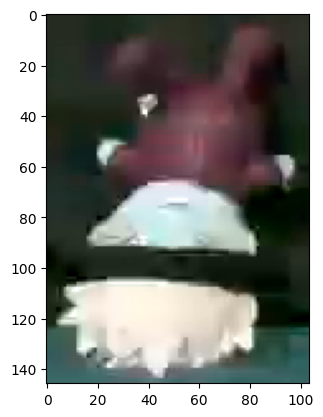

In [12]:
image = cv2.imread(f'{train_crops_path}/0/0_21.png')
plt.imshow(image)

In [13]:
import os
import random

counts = {}

crops_path = train_crops_path
num_plushies = 200

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_match(plushie, num1, num2):
    line = f"{plushie} {num1} {num2}\n"
    lines.append(line)

def add_mismatch(plushie1, num1, plushie2, num2):
    line = f"{plushie1} {num1} {plushie2} {num2}\n"
    lines.append(line)

len_data = 4000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num2}.png")):
        print(num1, num2, plushie)
        num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])
    
    add_match(plushie, num1, num2)

for i in range(len_data):
    # print(i)
    plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))
    while plushie1 == plushie2:
        plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])
                              
                              
    while not (os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie2}/{plushie2}_{num2}.png")):
        num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])

    add_mismatch(plushie1, num1, plushie2, num2)


f = open("plushie_pairs_train.txt", "a")
f.writelines(lines)
f.close()

{0: 67, 1: 65, 2: 66, 3: 65, 4: 65, 5: 65, 6: 61, 7: 66, 8: 66, 9: 64, 10: 66, 11: 65, 12: 65, 13: 64, 14: 66, 15: 65, 16: 66, 17: 65, 18: 66, 19: 65, 20: 65, 21: 66, 22: 65, 23: 66, 24: 65, 25: 65, 26: 65, 27: 65, 28: 64, 29: 65, 30: 65, 31: 65, 32: 65, 33: 66, 34: 66, 35: 65, 36: 65, 37: 65, 38: 65, 39: 65, 40: 65, 41: 64, 42: 65, 43: 65, 44: 66, 45: 65, 46: 66, 47: 63, 48: 66, 49: 65, 50: 65, 51: 65, 52: 64, 53: 66, 54: 65, 55: 66, 56: 66, 57: 65, 58: 65, 59: 65, 60: 65, 61: 63, 62: 65, 63: 64, 64: 65, 65: 65, 66: 66, 67: 66, 68: 65, 69: 65, 70: 66, 71: 66, 72: 66, 73: 65, 74: 63, 75: 64, 76: 65, 77: 65, 78: 65, 79: 63, 80: 63, 81: 64, 82: 64, 83: 63, 84: 64, 85: 64, 86: 64, 87: 56, 88: 56, 89: 56, 90: 58, 91: 62, 92: 62, 93: 58, 94: 65, 95: 63, 96: 57, 97: 61, 98: 61, 99: 56, 100: 60, 101: 56, 102: 61, 103: 60, 104: 57, 105: 61, 106: 60, 107: 54, 108: 57, 109: 59, 110: 60, 111: 56, 112: 57, 113: 60, 114: 55, 115: 56, 116: 56, 117: 61, 118: 57, 119: 57, 120: 57, 121: 56, 122: 56, 12

In [14]:
import os
import random

counts = {}

crops_path = val_crops_path
num_plushies = 10

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_match(plushie, num1, num2):
    line = f"{plushie} {num1} {num2}\n"
    lines.append(line)

def add_mismatch(plushie1, num1, plushie2, num2):
    line = f"{plushie1} {num1} {plushie2} {num2}\n"
    lines.append(line)

len_data = 400

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num2}.png")):
        print(num1, num2, plushie)
        num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])
    
    add_match(plushie, num1, num2)

for i in range(len_data):
    # print(i)
    plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))
    while plushie1 == plushie2:
        plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])
                              
                              
    while not (os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie2}/{plushie2}_{num2}.png")):
        num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])

    add_mismatch(plushie1, num1, plushie2, num2)


f = open("plushie_pairs_val.txt", "a")
f.writelines(lines)
f.close()

{0: 179, 1: 177, 2: 169, 3: 163, 4: 163, 5: 163, 6: 166, 7: 169, 8: 173, 9: 177}


In [15]:
import torch
import matplotlib.pyplot as plt

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
    
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def show_img(img1, img2):
    axs = plt.figure(figsize=(9, 9)).subplots(1, 2)
    axs[0].imshow(img1)
    axs[1].imshow(img2)


def accuracy(preds, labels):
    preds = torch.flatten(preds)
    preds[preds > 0] = 1
    preds[preds < 0] = 0
    return torch.sum(preds == labels).item() / len(labels)


class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)
    
    def __len__(self):
        return len(self.dl)

In [16]:
import torchvision.transforms as tt
import cv2

class BGR2RGB:
    def __call__(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class SquarePad:
    def __call__(self, image):
        max_wh = max(image.shape[:2])
        p_left, p_top = [(max_wh - s) // 2 for s in image.shape[:2]]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.shape[:2], [p_left, p_top])]
        return cv2.copyMakeBorder(image, p_top, p_bottom, p_left, p_right, cv2.BORDER_CONSTANT, None, value = 0)


class Resize():
    def __init__(self, output_size=(128, 128)):
        assert isinstance(output_size, (tuple))
        self.output_size = output_size

    def __call__(self, image):
        return cv2.resize(image, self.output_size, interpolation = cv2.INTER_LINEAR)

class Transforms:
    def __init__(self):
        self.transform = tt.Compose([BGR2RGB(), 
                        SquarePad(),
                        Resize((128, 128)),
                        tt.ToTensor(),
                        tt.Normalize(0, 0.5)])

    def __call__(self, image):
        return self.transform(image)
    

In [17]:
from torchvision.models import resnet50, ResNet50_Weights
from torch import cat
import torch.nn as nn

class SiameseNetwork(nn.Module):
    """
        https://github.com/pytorch/examples/tree/main/siamese_network

        BCE Loss
    """
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.resnet = resnet50(ResNet50_Weights.DEFAULT)

        for ct, child in enumerate(self.resnet.children()):
            if ct < 6:
                for param in child.parameters():
                    param.requires_grad = False


        self.fc_in_features = self.resnet.fc.in_features
        
        # remove the last layer of resnet18 (linear layer which is before avgpool layer)
        self.resnet = nn.Sequential(*(list(self.resnet.children())[:-1]))

        # add linear layers to compare between the features of the two images
        self.fc = nn.Sequential(
            nn.Linear(self.fc_in_features * 2, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 1),
        )


    def get_embeddings(self, x):
        output = self.resnet(x)
        output = output.view(output.size()[0], -1)
        return output

    def forward(self, input1, input2):
        output1 = self.get_embeddings(input1)
        output2 = self.get_embeddings(input2)
        output = cat((output1, output2), 1)
        output = self.fc(output)
        
        return output

In [18]:
import os
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from torch.utils.data import Dataset




class PlushieTrainDataset(Dataset):
    
    def __init__(self, filepath, img_dir, transform=None):
        self.samples = []
        self.img_dir = img_dir
        self.transform = transform

        with open(filepath, 'r') as f:
            self.samples = [line.strip() for line in f]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, i):
        line = self.samples[i].split()
        if len(line) == 3:
            anchor_name, anchor_num, img_num = line
            img_name = anchor_name
            is_same = 1
        elif len(line) == 4:
            anchor_name, anchor_num, img_name, img_num = line
            is_same = 0
        else:
            print(len(line), line)
            raise Exception("Shouldn't be here")
        
        anchor = cv2.imread(os.path.join(self.img_dir, str(anchor_name), f"{anchor_name}_{anchor_num}.png"))
        img = cv2.imread(os.path.join(self.img_dir, img_name, f"{img_name}_{img_num}.png"))
        
        if self.transform:
            anchor = self.transform(anchor)
            img = self.transform(img)

        return anchor, img, is_same



In [25]:
import numpy as np
import torch



def loss_batch(model, loss_func, anchor, image, label, opt=None, metric=None): # Update model weights and return metrics given xb, yb, model
    preds = model(anchor, image)
    loss = loss_func(preds, label.unsqueeze(1).float())
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        metric_result = metric(preds, label)
        
    return loss.item(), len(anchor), metric_result


def fit(epochs, model, loss_func, train_dl, val_dl, opt_func=torch.optim.SGD, lr=0.01, metric=None):
    train_losses, val_losses, val_metrics = [] , [], []
    
    opt = opt_func(model.parameters(), lr=lr)
    
    for epoch in range(1, epochs+1):
        model.train() # Setting for pytorch - training mode
        for anchor,image,label in train_dl:
            train_loss, _, _ = loss_batch(model, loss_func, anchor, image, label, opt) # update weights
            
        model.eval() # Setting - eval mode
        val_loss, total, val_metric = evaluate(model, loss_func, val_dl, metric)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        if metric is None:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, train_loss, val_loss))
        else:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}".format(
            epoch, train_loss, val_loss, metric.__name__, val_metric))
            
    return train_losses, val_losses, val_metrics


def evaluate(model, loss_func, val_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, anchor, image, label, metric=metric) for anchor, image, label in val_dl]
        
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
        return avg_loss, total, avg_metric



train_filepath = "plushie_pairs_train.txt"
train_img_dir = train_crops_path
val_filepath = "plushie_pairs_val.txt"
val_img_dir = val_crops_path
train_bs = 16
test_bs = 8
num_epochs = 1
lr = 0.005

torch.autograd.set_detect_anomaly(True)

transform = Transforms()
train_dataset = PlushieTrainDataset(filepath=train_filepath, img_dir=train_img_dir, transform=transform)
valid_dataset = PlushieTrainDataset(filepath=val_filepath, img_dir=val_img_dir, transform=transform)
network = SiameseNetwork()


print("The length of Train set is {}".format(len(train_dataset)))
print("The length of Valid set is {}".format(len(valid_dataset)))

train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=train_bs, shuffle=True, num_workers=4)
val_dl = torch.utils.data.DataLoader(valid_dataset, batch_size=test_bs, shuffle=True, num_workers=4)

device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(network, device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam


train_losses, val_losses, val_metrics = fit(num_epochs, network, criterion, 
                                        train_dl, val_dl, optimizer, lr, accuracy)

torch.save(network.state_dict(), 'model2.pth')


The length of Train set is 8000
The length of Valid set is 800
Epoch [1], train_loss: 0.6751, val_loss: 0.6913, val_accuracy: 0.4925


In [20]:
def predict_image(model, target, img, transform=None, device=torch.device('cpu')):
    xb, xb2 = transform(target).unsqueeze(0), transform(img).unsqueeze(0) # Convert to batch of 1
    model.eval()
    yb = model(xb.to(device), xb2.to(device))
    return yb


In [21]:

!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15705, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15705 (delta 9), reused 15 (delta 3), pack-reused 15672
Receiving objects: 100% (15705/15705), 14.45 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (10755/10755), done.


In [22]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.7/592.7 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [43]:
import pandas as pd

bb_ann = {"Image_ID": [], "class": [], "confidence": [], "ymin": [], "xmin": [], 
          "ymax": [], "xmax": []}


yolo_repo_path = 'yolov5'
yolo_model_path = '/content/drive/MyDrive/BH/best.pt'
reid_model_path = "/content/drive/MyDrive/BH/model.pth"

yolo_model = torch.hub.load(yolo_repo_path, 'custom', path=yolo_model_path, source='local')

reid_model = SiameseNetwork()
reid_model.load_state_dict(torch.load(reid_model_path, map_location=torch.device('cuda')))

test_dir = "test_images"
suspect_dir = "suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

reid_transforms = Transforms()

def detect_objects(image_name):
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)

    img = cv2.imread(image_path)
    suspect = cv2.imread(suspect_path)
    
    img_h, img_w = img.shape[:2]

    # Perform object detection
    results = yolo_model(img)

    # Print the detected objects with their classes, confidence scores, and bounding box coordinates
    for result in results.xyxy[0].tolist():
        class_id = int(result[5])
        confidence = result[4]
        x1, y1, x2, y2 = result[:4]
        plushie = img[int(y1):int(y2), int(x1):int(x2)]
        match_confidence = float(predict_image(reid_model, suspect, plushie, transform=reid_transforms))
        plushie_class = 1 if match_confidence > 0 else 0

        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(plushie_class) 
        bb_ann["confidence"].append(confidence)
        bb_ann["ymin"].append(y1 / img_h)
        bb_ann["xmin"].append(x1 / img_w)
        bb_ann["ymax"].append(y2 / img_h)
        bb_ann["xmax"].append(x2 / img_w)
        
    if not results.xyxy[0].tolist():
        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(0) 
        bb_ann["confidence"].append(0)
        bb_ann["ymin"].append(0)
        bb_ann["xmin"].append(0)
        bb_ann["ymax"].append(0)
        bb_ann["xmax"].append(0)



for i, image_name in enumerate(os.listdir(test_dir)[:10]):
    detect_objects(image_name)



df = pd.DataFrame.from_dict(bb_ann)
df.to_csv("results.csv", index=False)

YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [44]:
df.head(10)

,Image_ID,class,confidence,ymin,xmin,ymax,xmax
0,image_1304,1,0.950657,0.658954,0.589958,0.820094,0.694856
1,image_1199,0,0.972840,0.707469,0.626577,0.877728,0.852762
2,image_1199,0,0.971902,0.711073,0.209896,0.857084,0.334352
3,image_1199,0,0.958097,0.710285,0.395108,0.994014,0.561077
4,image_0565,0,0.964411,0.739354,0.621964,0.855752,0.727172
5,image_0565,0,0.952991,0.732585,0.286470,0.860016,0.451540
6,image_0565,0,0.623307,0.877558,0.439998,0.997886,0.581403
7,image_1332,1,0.963898,0.699661,0.357891,0.822614,0.452652
8,image_1332,0,0.930924,0.707366,0.178480,0.820862,0.261675
9,image_1332,0,0.887497,0.700528,0.508276,0.845304,0.609647


In [46]:
print("hello")

hello
